<a href="https://colab.research.google.com/github/jasminpomasoncco/Clasificador-de-imagenes/blob/master/Clasificador_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [54]:
#cargar dataset
data, metadata = tfds.load('cifar100', with_info=True, as_supervised=True)

In [55]:
metadata

tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir='/root/tensorflow_datasets/cifar100/3.0.2',
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
    }),
    supervised_keys=('image', 'label'),
    disable_shuf

In [56]:
train_data, test_data = data['train'], data['test']

In [57]:
class_names = metadata.features['label'].names

In [51]:
class_names

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [58]:
def normalize(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

train_data = train_data.cache()
test_data = test_data.cache()

(32, 32, 3)


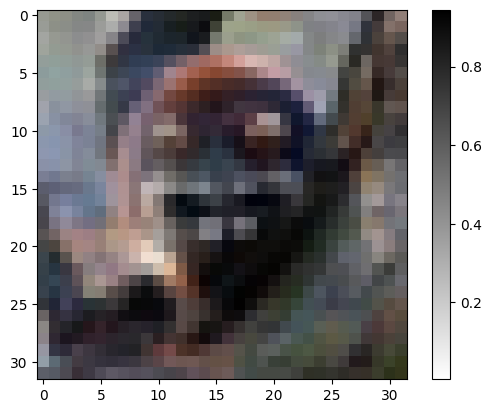

In [59]:
for image, label in train_data.take(1):
    resized_image = tf.image.resize(image, [32, 32])

print(resized_image.shape)

import matplotlib.pyplot as plt

#Dibujar dibujar
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

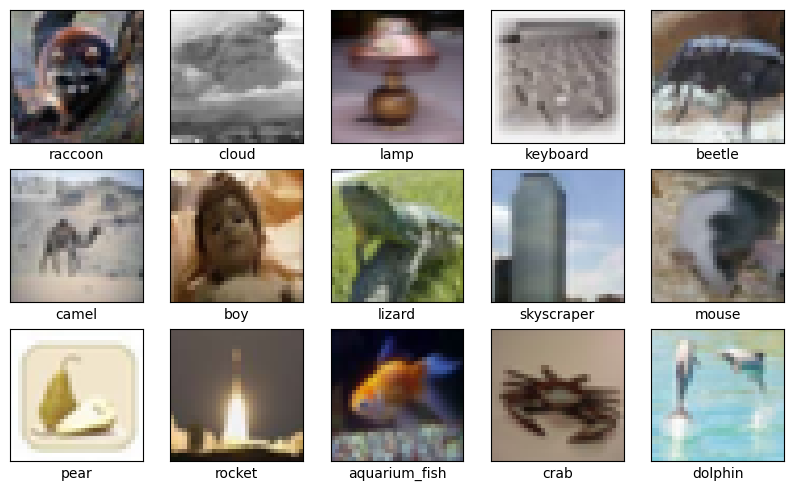

In [61]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_data.take(15)):
  resized_image = tf.image.resize(image, [32, 32])
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [62]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.softmax) #Para redes de clasificacion
])

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
num_ej_train = metadata.splits["train"].num_examples
num_ej_test = metadata.splits["test"].num_examples
print(num_ej_test)
print(num_ej_train)

10000
50000


In [64]:
TAMANO_LOTE = 32
train_data = train_data.repeat().shuffle(num_ej_train).batch(TAMANO_LOTE)
test_data = test_data.batch(TAMANO_LOTE)

In [65]:
import math

#Entrenar modelo
historial = modelo.fit(train_data, epochs=5, steps_per_epoch= math.ceil(num_ej_train/TAMANO_LOTE))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.0220 - loss: 4.4735
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0462 - loss: 4.2004
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.0534 - loss: 4.1435
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0608 - loss: 4.0857
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0680 - loss: 4.0043


In [66]:
for image, label in train_data.take(1):
    print("Forma de la imagen:", image.shape)
    print("Forma de la etiqueta:", label.shape)

Forma de la imagen: (32, 32, 32, 3)
Forma de la etiqueta: (32,)


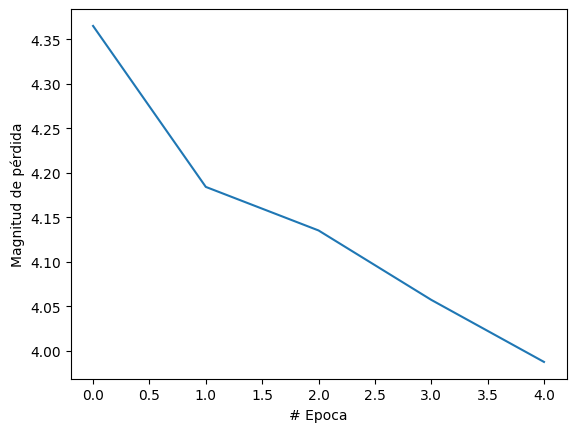

In [67]:
#funcion
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

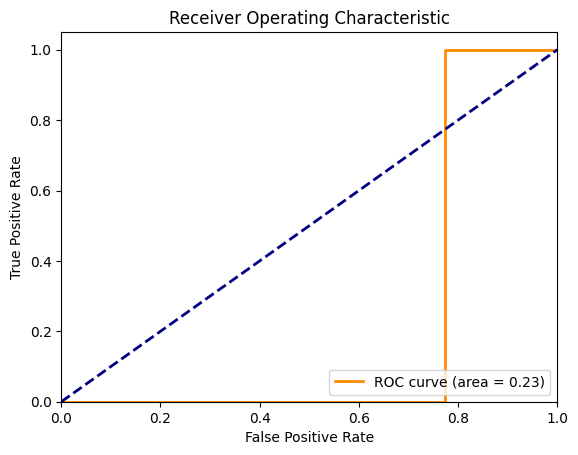

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

for test_images, test_labels in test_data.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()

# Calcular la curva ROC y AUC
fpr, tpr, _ = roc_curve(test_labels, np.max(predicciones, axis=1), pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


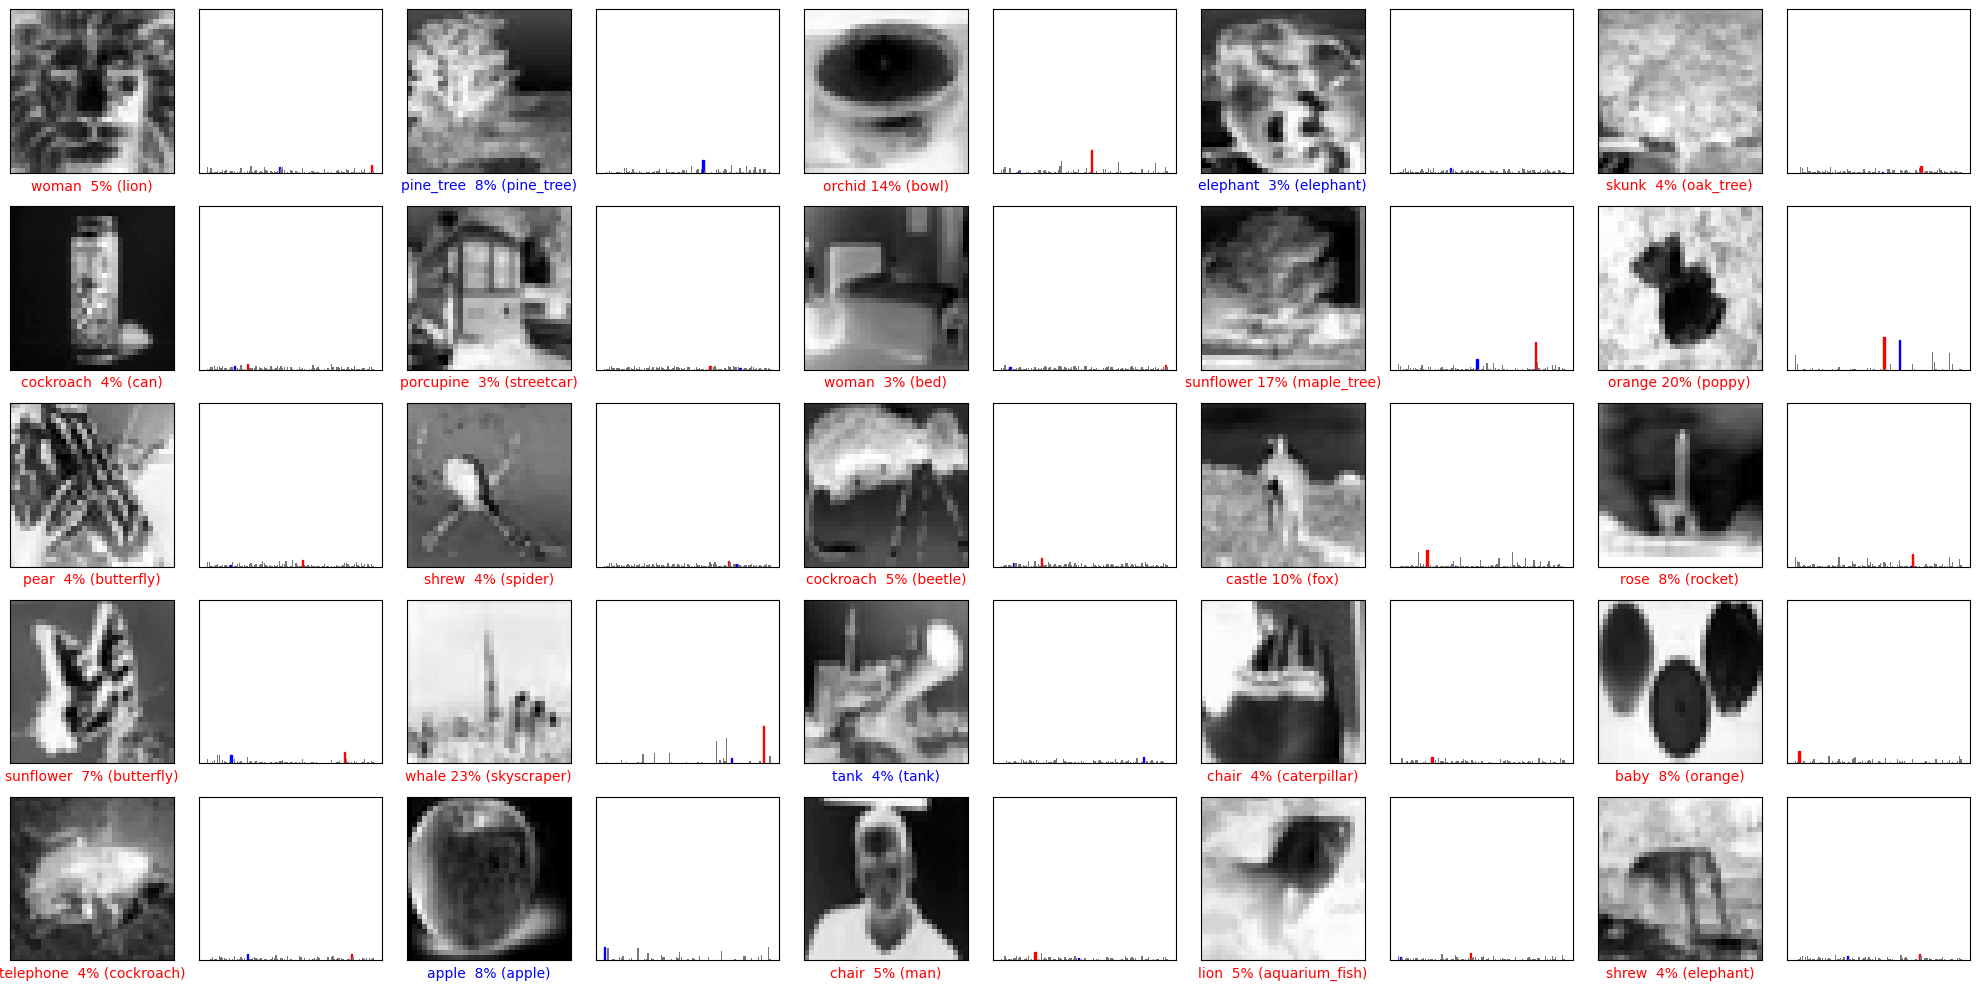

In [80]:
import numpy as np
import matplotlib.pyplot as plt

for test_images, test_labels in test_data.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()

# Realizar predicciones
predicciones = modelo.predict(test_images)


class_name = [str(i) for i in range(predicciones.shape[1])]

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    color = 'blue' if etiqueta_prediccion == etiqueta_real else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[etiqueta_prediccion],
                                100 * np.max(arr_predicciones),
                                class_names[etiqueta_real]),
                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones_i = arr_predicciones[i]
    etiqueta_real_i = etiqueta_real[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    grafica = plt.bar(range(len(arr_predicciones_i)), arr_predicciones_i, color="#777777")
    plt.ylim([0, 1])

    etiqueta_prediccion = np.argmax(arr_predicciones_i)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real_i].set_color('blue')

# Graficar imágenes y sus predicciones
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))

for i in range(min(num_imagenes, len(test_images))):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, test_labels, test_images)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, test_labels)

plt.tight_layout()
plt.show()


In [81]:
image = test_images[0]
image = np.array([image])
prediccion = modelo.predict(image)

print("Prediccion: " + class_names[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediccion: woman


In [74]:
from sklearn.metrics import accuracy_score

predicciones_clase = np.argmax(predicciones, axis=1)

precision = accuracy_score(test_labels, predicciones_clase)
print(f'Precisión: {precision:.4f}')

Precisión: 0.1875
